In [ ]:

import numpy as np
import skimage as sk
import cv2
import imutils
import matplotlib.pyplot as plt

from skimage.io import imread, imshow, imsave
from skimage.transform import resize
from skimage.draw import rectangle, disk


In [ ]:

def display_image(image, cmap='viridis', axis='off'):
    plt.imshow(image, cmap=cmap)
    plt.axis(axis)  
    plt.show()

def display_filtered(image, filtered, cmap='viridis', axis='off'):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Original')
    plt.imshow(image)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.title('Filtered')
    plt.imshow(filtered, cmap=cmap)
    plt.axis('off')
    plt.show()
    



## ---- ---- Simple operations ---- ----



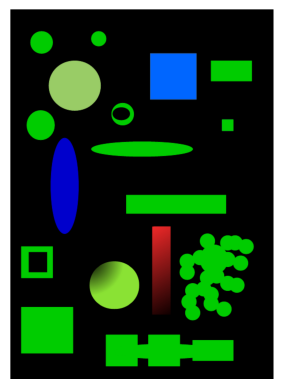

In [64]:
    
file = 'image_01.png'

image = cv2.imread('./' + file)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

display_image(image)


In [2]:

height, width, channels = image.shape

print()
print('    Height: ' + str(height) + 'px')
print('    Width: ' + str(width) + 'px')
print('    Nb channels: ' + str(channels))
print()



    Height: 760px
    Width: 541px
    Nb channels: 3



In [3]:

pixel = image[100, 150]

r, g, b = pixel

print()
print('    Red: ' + str(r))
print('    Blue: ' + str(g))
print('    Green: ' + str(b))
print()



    Red: 0
    Blue: 0
    Green: 0



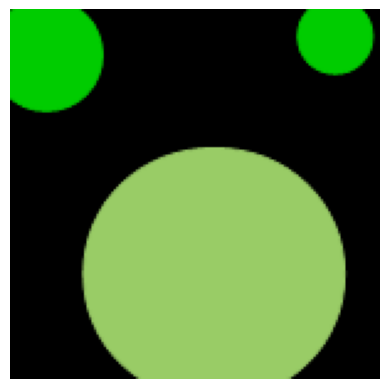

In [4]:

# crop
y1, x1 = 50, 50
y2, x2 = 200, 200

cropped = image[y1:y2, x1:x2]

cv2.imwrite('cropped_' + file, cropped)

display_image(cropped)


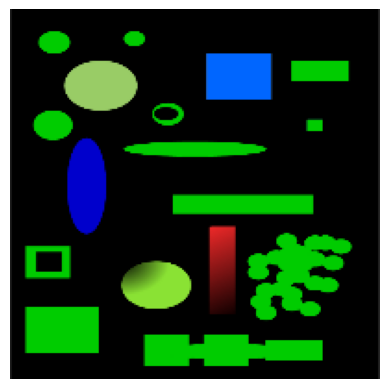

In [8]:

# resize 200x200

width = 200
height = 200

image = (image * 255).astype(np.uint8)

resized = cv2.resize(image, (width, height)) 
resized = resized.astype(image.dtype)

cv2.imwrite('resized_' + file, resized)

display_image(resized)


541
760
280


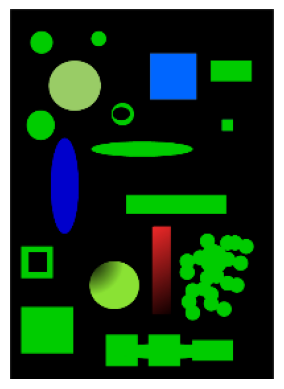

In [9]:

# resize without affect ratio

from_height, from_width = image.shape[:2]

new_width = 200

ratio = new_width / from_width

new_height = int(from_height * ratio)

print(from_width)
print(from_height)
print(new_height)

resized = cv2.resize(image, (new_width, new_height)) 

cv2.imwrite('resized_' + file, resized)

display_image(resized)


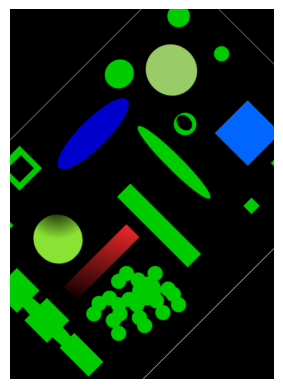

In [10]:

# rotate -45°

rotated = imutils.rotate(image, angle=-45)

imsave('rotated_' + file, rotated)

display_image(rotated)



## ---- ---- Draw ---- ----


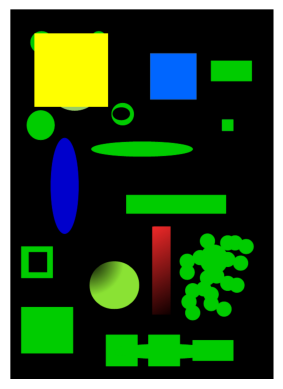

In [11]:

image_copy = np.copy(image)

y1, x1 = 50, 50
y2, x2 = 200, 200

rr, cc = rectangle(start=(y1, x1), end=(y2, x2), shape=image.shape)

image_copy[rr, cc] = (255, 255, 0)

display_image(image_copy)


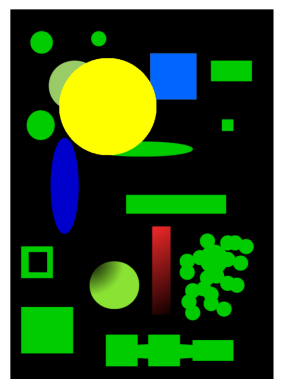

In [12]:

image_copy = np.copy(image)

centre_y, centre_x = 200, 200
rayon = 100

rr, cc = disk((centre_y, centre_x), rayon, shape=image_copy.shape)

image_copy[rr, cc] = (255, 255, 0) 

display_image(image_copy)



## ---- ---- Filter ---- ----


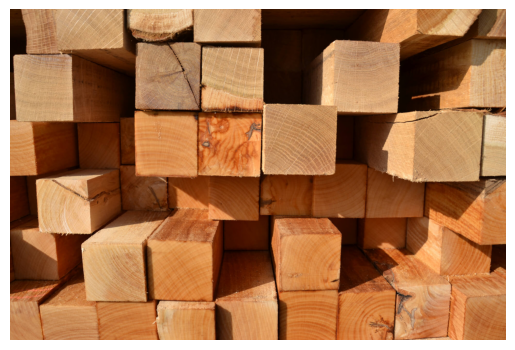

In [13]:

img = cv2.imread('./wood.png')

image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

display_image(image)


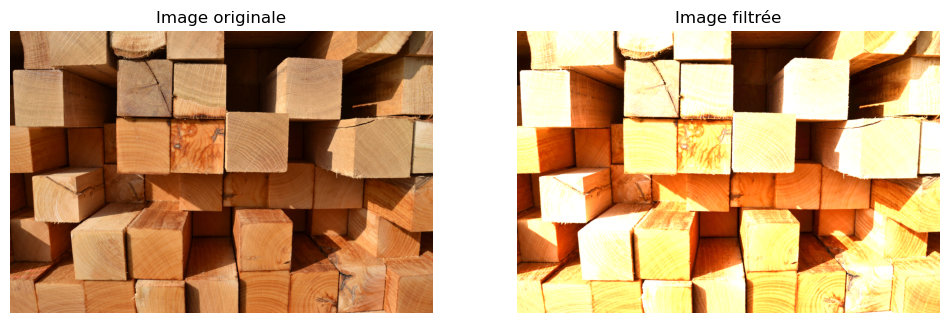

In [14]:

# use method "cv2.filter2D" with kernel size 2

blured = cv2.filter2D(image, -1, 2)

display_filtered(image, blured)


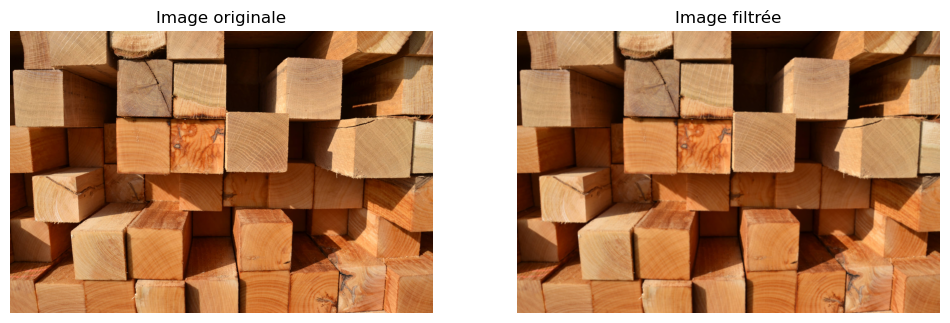

In [15]:

# blur kernel 5x5

blured = cv2.blur(image, (5, 5))

display_filtered(image, blured)


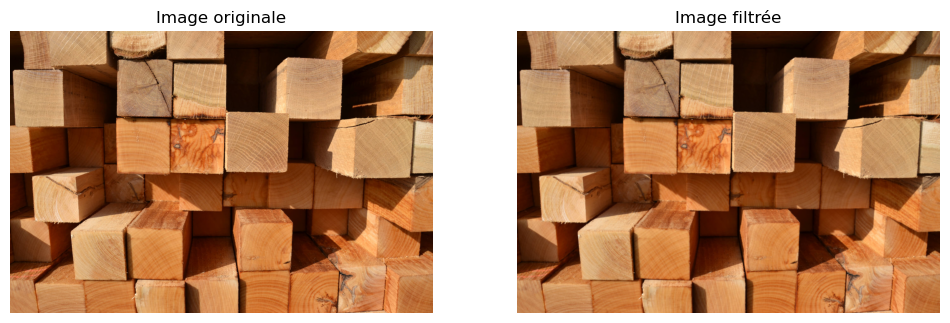

In [16]:

# gaussian blur

blured = cv2.GaussianBlur(image, (5, 5), 0)

display_filtered(image, blured)


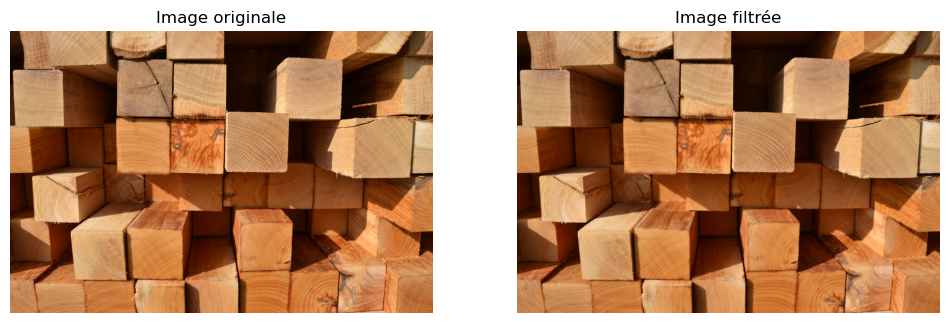

In [17]:

# median blur

blured = cv2.medianBlur(image, 5)

display_filtered(image, blured)


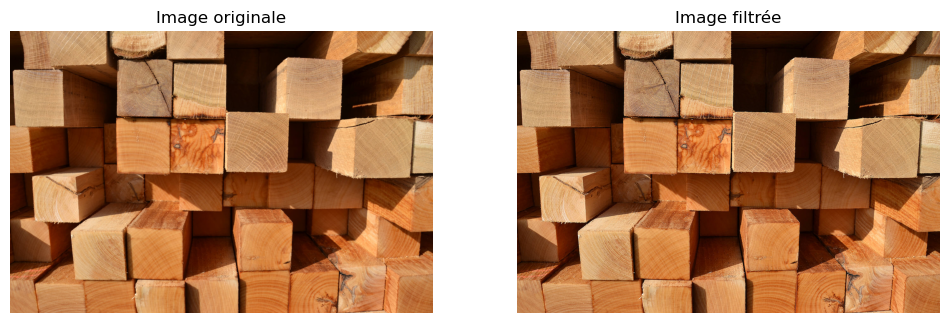

In [18]:

# sharpening

kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]], dtype=np.float32)

sharpened = cv2.filter2D(image, -1, kernel)

display_filtered(image, sharpened)


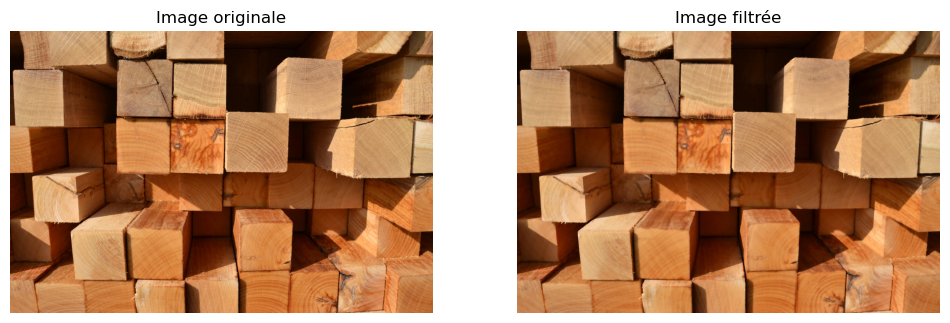

In [19]:

# bilateral filtering

bilateral_filtered = cv2.bilateralFilter(image, 9, 75, 75)

display_filtered(image, bilateral_filtered)



## ---- ---- Threshold ---- ----


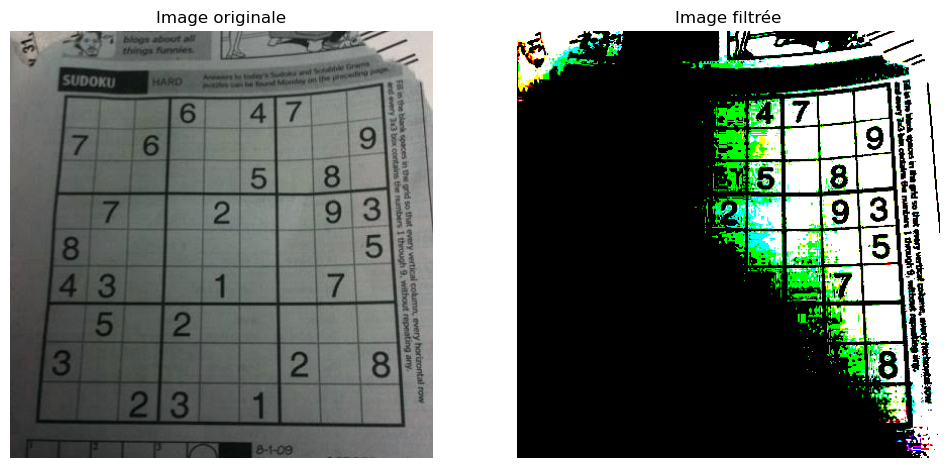

In [40]:

# binary threshold 127

image = cv2.imread('sudoku.jpg')
# image = cv2.imread('sudoku.jpg', cv2.IMREAD_GRAYSCALE)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

display_filtered(image, binary_image)


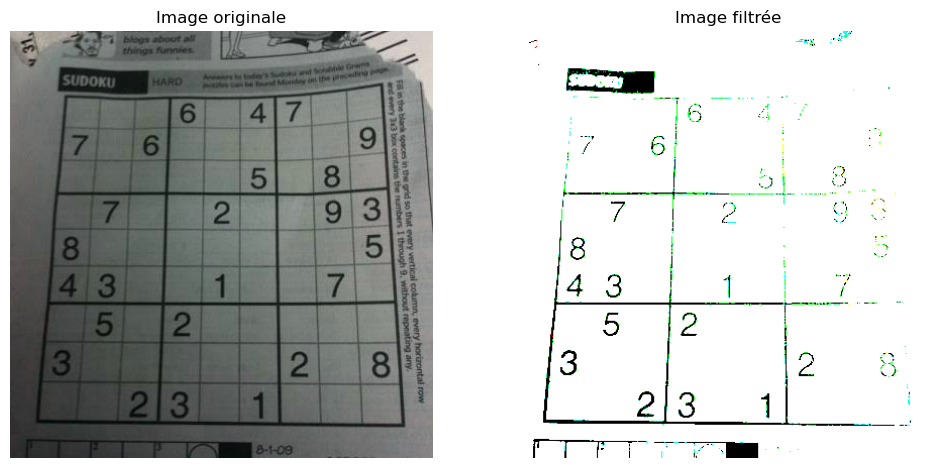

In [41]:

# binary threshold 30

_, binary_image = cv2.threshold(image, 30, 255, cv2.THRESH_BINARY)

display_filtered(image, binary_image)


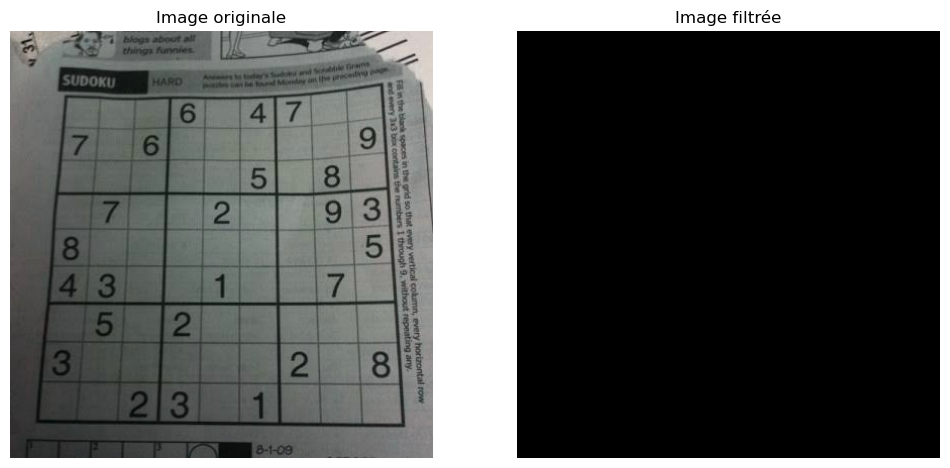

In [42]:

# binary threshold 240

_, binary_image = cv2.threshold(image, 240, 255, cv2.THRESH_BINARY)

display_filtered(image, binary_image)


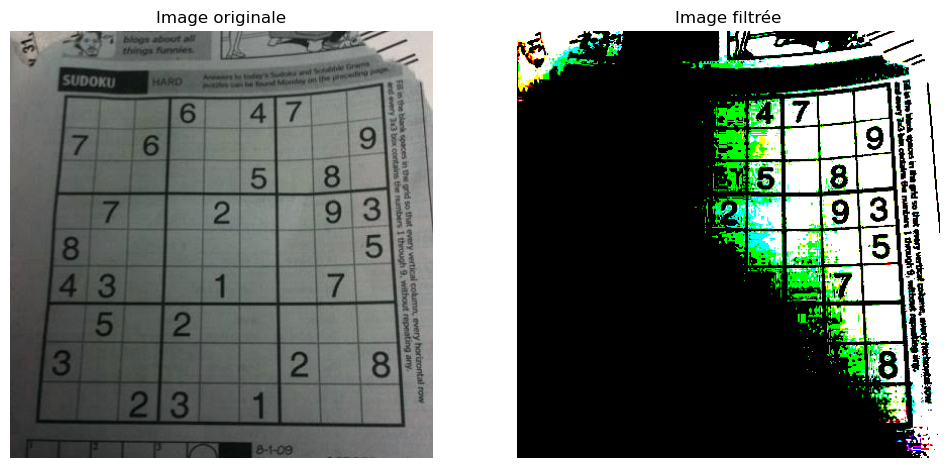

In [44]:

# Otsu threshold

_, otsu_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

display_filtered(image, otsu_image)


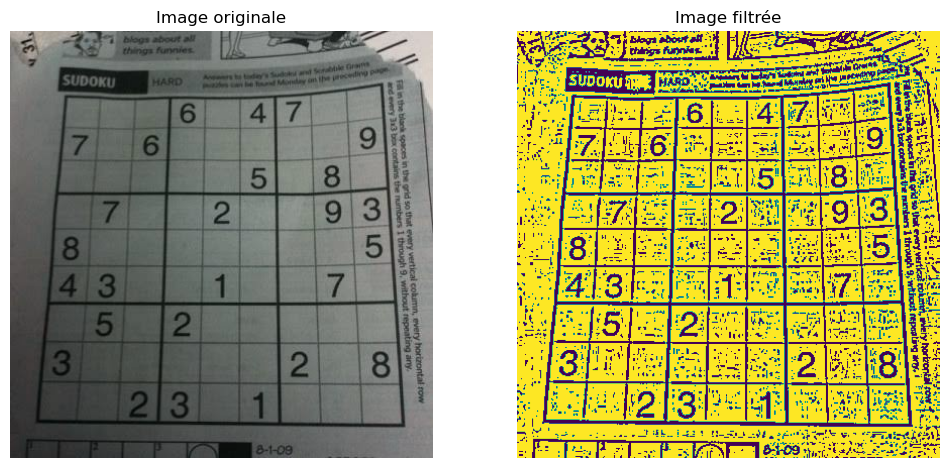

In [46]:

# Adaptive threshold

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

adaptive_image = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

display_filtered(image, adaptive_image)



## ---- ---- Edge detection && object counting ---- ----


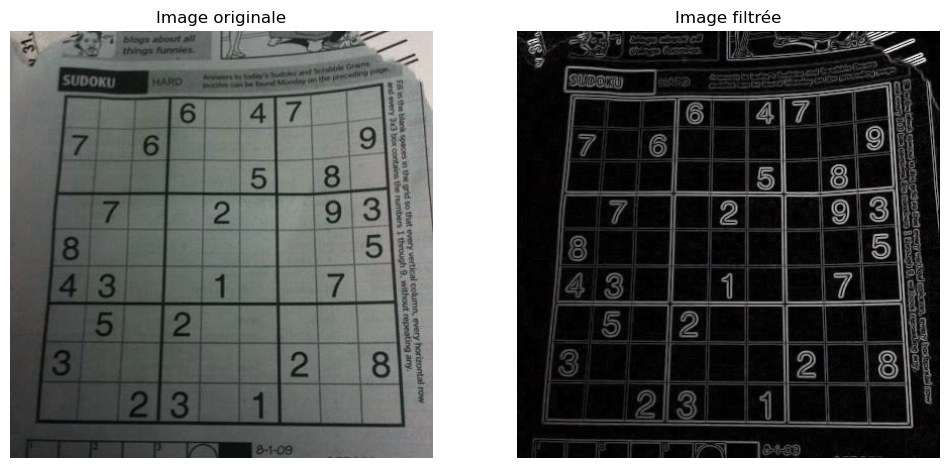

In [47]:

image = cv2.imread('sudoku.jpg') 

# use method sobel
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

edges = cv2.normalize(magnitude, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

display_filtered(image, edges)


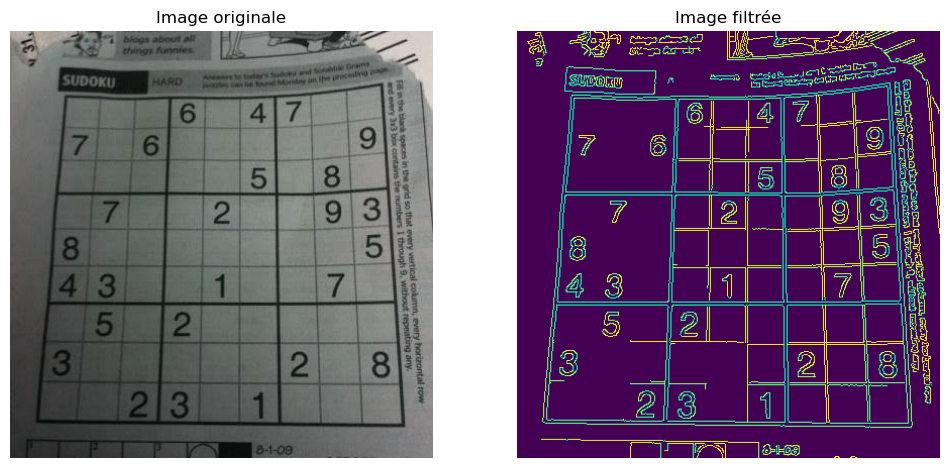

In [48]:

# use method canny
edges = cv2.Canny(image, 100, 200)

display_filtered(image, edges)


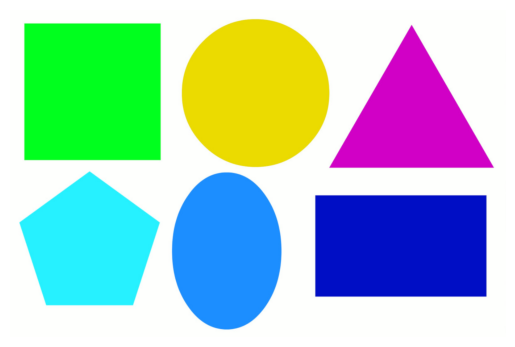

In [70]:

image = cv2.imread('image_02.png')

display_image(image)


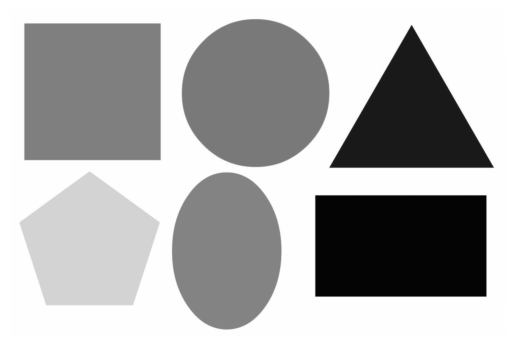

In [71]:

image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

display_image(image, cmap='gray')


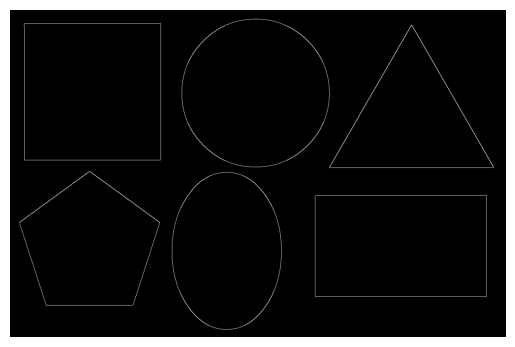

In [72]:

edged = cv2.Canny(image, 30, 150)

display_image(edged, cmap='gray')


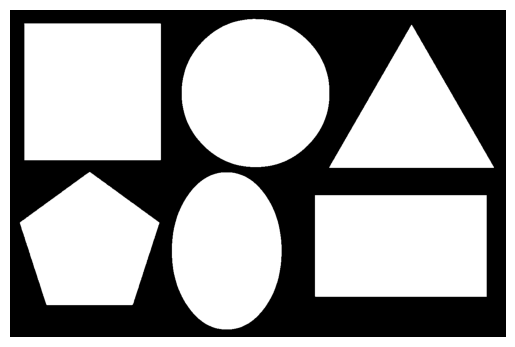

In [78]:

_, thresholded = cv2.threshold(image, 225,225, cv2.THRESH_BINARY_INV)

display_image(thresholded, cmap='gray')


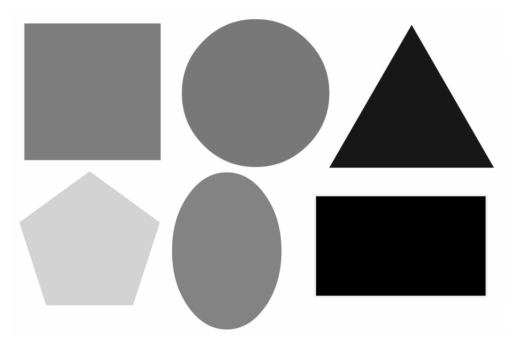

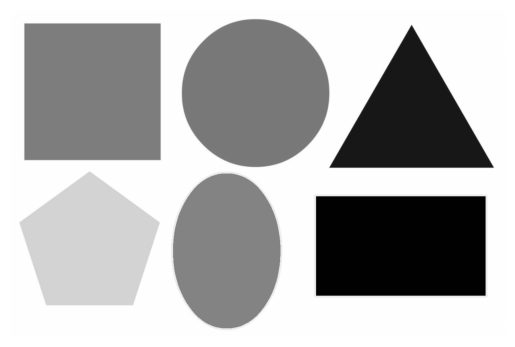

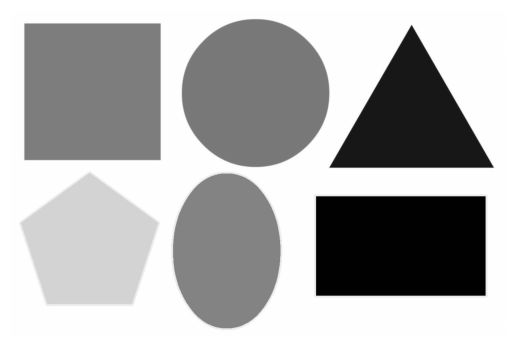

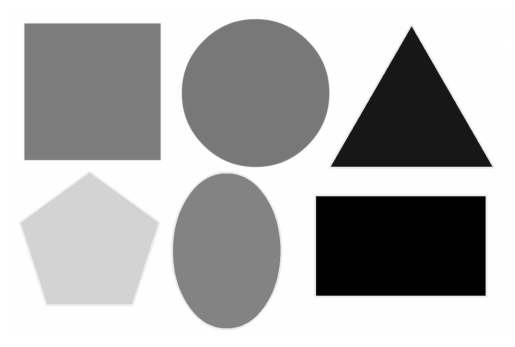

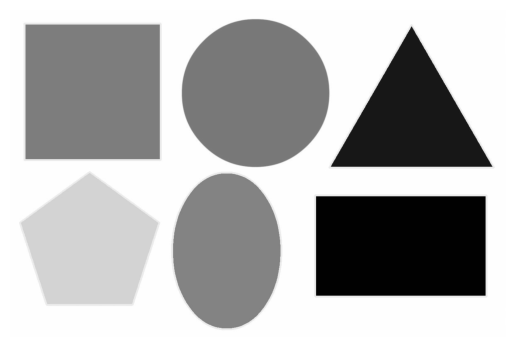

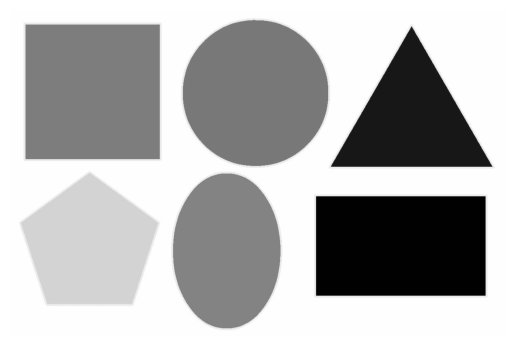

In [81]:

contours = cv2.findContours(thresholded.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)

output = image.copy()

for contour in contours:
    cv2.drawContours(output, [contour], -1, (240,0,159), 3)
    display_image(output, cmap='gray')
    

In [83]:

text = "There are {} objects here.".format(len(contours))

print()
print(text)
print()



There are 6 objects here.

